<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: Time series first notebook</h1>
#### Thanks again to Leo Siqueira for contributions

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Methods of time series analysis
1. <a href="#stationary">First thing: establishing stationarity</a>
1. <a href="#composing">Composing a sum of Fourier harmonics</a>
1. <a href="#decomposing">Decomposing, using orthogonality</a>
1. <a href="#spectrum">Variance density by frequency (power spectrum)</a>
1. <a href="#autocorrelation">Lagged (auto) correlation/covariance</a>
1. <a href="#AR1noise">AR1 model of geophysical processes</a>

--------

<a name="stationary"></a>
### Stationary Processes

A "process" (time series) X(t) is said to be **Weakly Stationary** if the mean $\mu_X(t)$ and the *lag covariance* $C_{XX}(t,t+\tau) = \overline{X_t \cdot X_{t+\tau}}$ are independent of time $t$. 
A process is said to be **Strongly Stationary** if _all possible probability distributions_ are independent of $t$.  Since this is hard to prove as a practical matter in data, it is just a math distinction, mainly of academic value.

A special category of *weakly stationary* is **ergodic** processes with the property that "given sufficient time, they include or impinge on all points in a given space, and can be represented statistically by a reasonably large selection of points." As scientists, this is what we usually assume. Formally a process is **ergodic** if

\begin{align}
    \mu_X(k) &= \lim_{T\to\infty} \frac{1}{T}\int_0^T X(t)\ \mathrm{d}t\\
    C_{XX}(\tau,k) &= \lim_{T\to\infty}  \frac{1}{T}\int_0^T \left( X_k(t)-\mu_X(t) \right)\left( X_k(t+\tau)-\mu_X(t+\tau) \right)\ \mathrm{d}t\\
\end{align}

-----------

<hr style="height:2px;">
<a href="#top">Top</a>
<hr style="height:2px;">

<a name="composing"></a>
### Composing time series from sines and cosines

Let's build up some time series from sines and cosines. Will these be stationary? **Why?** 

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
# GridSpec lets us align plots carefully 
from matplotlib import gridspec

import scipy.stats as stats
import numpy as np
from numpy.random import rand
from pylab import rcParams, pcolor, show, colorbar, xticks, yticks, title, figure
import netCDF4
from netCDF4 import Dataset

rcParams['figure.figsize'] = (14, 7)

In [4]:
f = netCDF4.Dataset(r'C:\Users\cgmer\Documents\SCHOOL\MPO624\GITHUB\2018\assignments\module2-timeseries\MiamiBeach_Precip.nc')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: 
    description: MIAMI BEACH, FL
    institution: KNMI Climate Explorer and NOAA/NCEI
    source_url: https://catalog.data.gov/dataset/global-historical-climatology-network-daily-ghcn-daily-version-3
    source_doi: https://doi.org/10.7289/V5D21VHZ
    contact_email: ncdc.ghcnd@noaa.gov
    reference: Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.
    license: U.S. Government Work. The non-U.S. data cannot be redistributed within or outside of the U.S. for any commercial activities.
    station_code: USW00092811
    station_name: MIAMI_BEACH,_FL
    station_country: United States
    latitude:   25.81 degrees_north
    longitude:  -80.13 degrees_east
    elevation:      0.0 m
    climexp_url:

In [5]:
print(f.variables.keys())

odict_keys(['time', 'PRCP'])


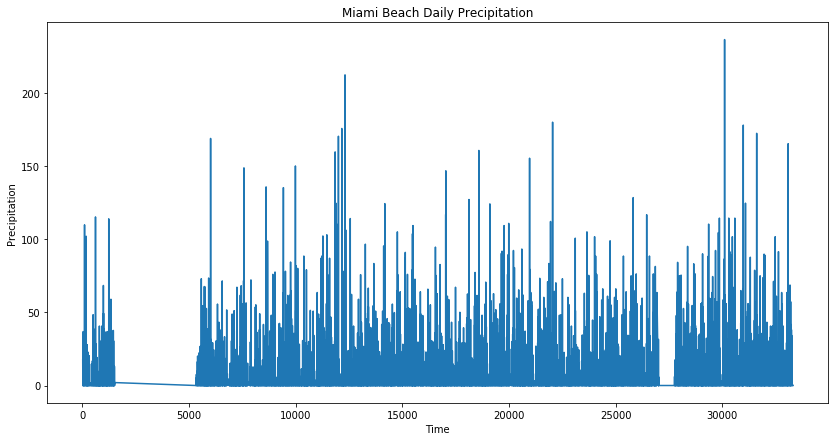

In [7]:
f.variables
t  = np.array(f.variables['time']) 
rain = np.array(f.variables['PRCP'])  
rain[rain==3e+33]=np.nan                #Remove nans
t  = t[~np.isnan(rain)]
rain = rain[~np.isnan(rain)]

plt.plot(t,rain)
plt.xlabel('Time');plt.ylabel('Precipitation');
plt.title('Miami Beach Daily Precipitation');

In [14]:
def fig1():
    fig=plt.figure()
    gs = gridspec.GridSpec(1, 2, width_ratios=[2,1])
    ax=fig.add_subplot(gs[0])
    ax.plot(t,rain)
    ax.set_xlabel('Time [days]');ax.set_ylabel('Precipitation');
    ax=fig.add_subplot(gs[1]); ax.set_xlabel('PDF & normal approx.')
    n,bins,pa=ax.hist(rain,101,orientation='horizontal', \
                      normed='True',label='pdf of V')
    # Approximate it with a normal distribution of same mean and std
    normapprox = stats.norm.pdf(bins,loc=np.mean(rain),scale=np.std(rain))
    ax.plot(normapprox, bins)

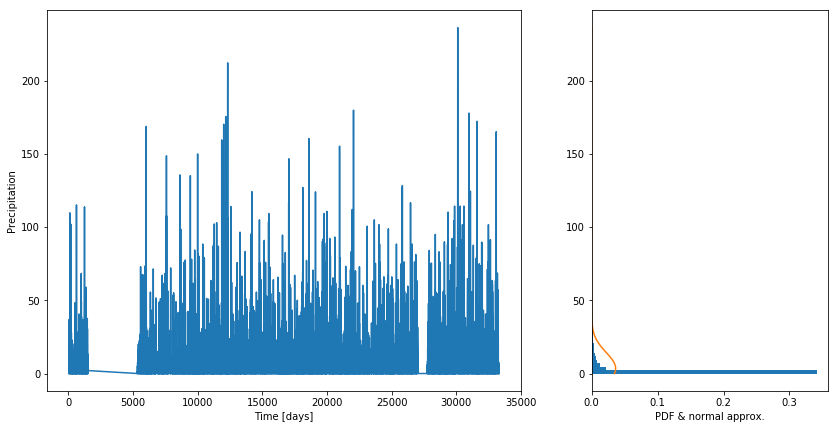

In [15]:
fig1()

Obviously my amount of data doesn't seem to be perfect for this exercise... but I understand the conccept!

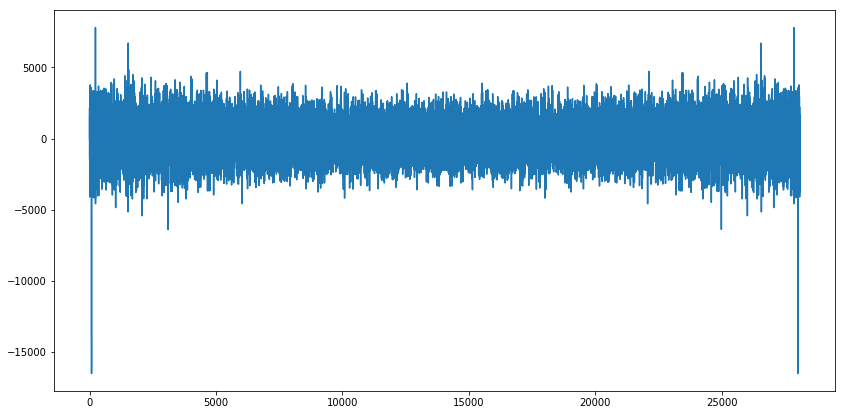

In [17]:
# Take the simple FFT, after removing the mean

rainp = rain - rain.mean()

#To match the sign above, roll the array so it starts at t=0. 
# Vp = np.roll(Vp, int(-NT/2) ) Too fussy: just know the sign is opposite

# BOOM! Notice there is no time axis, just the values, hence the roll issue above
rainspec = np.fft.fft( rainp )

# It is symmetric, with low frequencies at BOTH ENDS, except 0 (the mean)
fig,ax=plt.subplots(1,1) 
ax.plot(rainspec.real)

In [18]:

# Define the frequencies "freqs" (noting the symmetry -- but 0 occurs only at left)# Define 

freqs = np.array(range(len(t)))   # This gets the left end correct
reversed_freqs = freqs[::-1]  # Reverse the array 
reversed_freqs[0:int(NT/2)] = freqs[1:int(NT/2)+1] # Fix the low end of the reversed array
freqs = reversed_freqs[::-1]  # reverse it back 

fig,ax=plt.subplots(1,1) 
ax.stem(freqs, HPspec.real)
ax.set_xlim([0,N + 5])
ax.set_xlabel('Cycles per (length of record)')
ax.set_ylabel('Some measure of cosine component amplitude')

NameError: name 'NT' is not defined

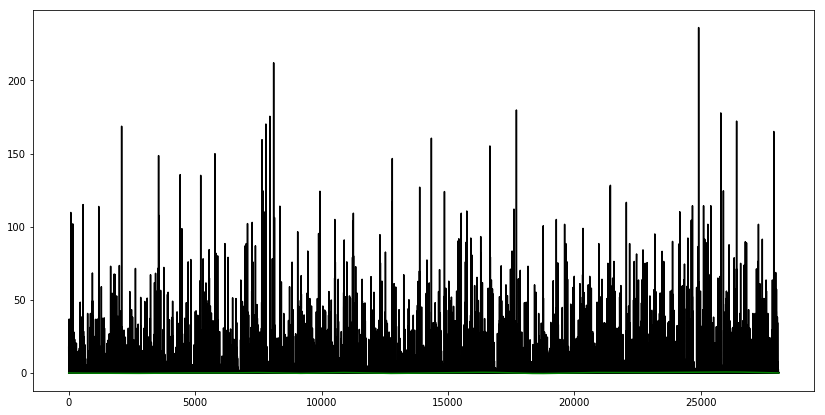

In [19]:
TRUNC = 10

rainspec_trunc = rainspec.copy()
rainspec_trunc[np.where(freqs > TRUNC)] *= 0. 
rainrecon = np.fft.ifft(rainspec_trunc).real

# How's the reconstruction? 
fig,ax=plt.subplots(1,1) 
ax.plot(rain,      color='black')
ax.plot(rainrecon,  color='green')